In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
import json
from scipy.stats import norm, mode
from sklearn import tree
from matplotlib.pyplot import figure

# Importando parametros de modelos

In [2]:
w = joblib.load("w.joblib")
dtree = joblib.load("tree.joblib")
svc = joblib.load("svc.joblib")
with open('probs.json') as f:
    probs = json.load(f)
    
X = joblib.load("X.joblib")
y = joblib.load("y.joblib")

# Creando funciones predictoras para naive bayes y regresion logistica

In [3]:
def naive_predict(X, probs):
    #Se construiran dos ndarrays de una columa para cada feature con un total de filas igual a la cantidad de filas en X
    #Estos ndarrays seran las probabilidades de P(xi|y)
    #Los ndarrays se combinaran al final dos diferentes ndarrays para hacer la multiplicacion por filas
    
    f0y = lambda x: norm.pdf(x, probs["0"][0][0], probs["0"][0][1])
    feat_0_yes = f0y(X[:, 0]).reshape(-1,1)
    
    f0n = lambda x: norm.pdf(x, probs["0"][1][0], probs["0"][1][1])
    feat_0_no = f0y(X[:, 0]).reshape(-1,1)
    
    f1y = lambda x: norm.pdf(x, probs["1"][0][0], probs["1"][0][1])
    feat_1_yes = f1y(X[:, 1]).reshape(-1,1)
    
    f1n = lambda x: norm.pdf(x, probs["1"][1][0], probs["1"][1][1])
    feat_1_no = f0y(X[:, 1]).reshape(-1,1)
    
    f2y = lambda x: norm.pdf(x, probs["2"][0][0], probs["2"][0][1])
    feat_2_yes = f0y(X[:, 2]).reshape(-1,1)
    
    f2n = lambda x: norm.pdf(x, probs["2"][1][0], probs["2"][1][1])
    feat_2_no = f0y(X[:, 2]).reshape(-1,1)
    
    feat_3_yes = np.copy(X[:, 3])
    feat_3_yes[feat_3_yes == 1] = feat_3_yes[feat_3_yes == 1]*probs["3"][0]
    feat_3_yes[feat_3_yes == 0] = 1
    feat_3_yes = feat_3_yes.reshape(-1,1)
    
    feat_3_no = np.copy(X[:, 3])
    feat_3_no[feat_3_no == 1] = feat_3_no[feat_3_no == 1]*probs["3"][1]
    feat_3_no[feat_3_no == 0] = 1
    feat_3_no = feat_3_no.reshape(-1,1)
    
    feat_4_yes = np.copy(X[:, 4])
    feat_4_yes[feat_4_yes == 1] = feat_4_yes[feat_4_yes == 1]*probs["4"][0]
    feat_4_yes[feat_4_yes == 0] = 1
    feat_4_yes = feat_4_yes.reshape(-1,1)
    
    feat_4_no = np.copy(X[:, 4])
    feat_4_no[feat_4_no == 1] = feat_4_no[feat_4_no == 1]*probs["4"][1]
    feat_4_no[feat_4_no == 0] = 1
    feat_4_no = feat_4_no.reshape(-1,1)
    
    feat_5_yes = np.copy(X[:, 5])
    feat_5_yes[feat_5_yes == 1] = feat_5_yes[feat_5_yes == 1]*probs["5"][0]
    feat_5_yes[feat_5_yes == 0] = 1
    feat_5_yes = feat_5_yes.reshape(-1,1)
    
    feat_5_no = np.copy(X[:, 5])
    feat_5_no[feat_5_no == 1] = feat_5_no[feat_5_no == 1]*probs["5"][1]
    feat_5_no[feat_5_no == 0] = 1
    feat_5_no = feat_5_no.reshape(-1,1)
    
    feat_6_yes = np.copy(X[:, 6])
    feat_6_yes[feat_6_yes == 1] = feat_6_yes[feat_6_yes == 1]*probs["6"][0]
    feat_6_yes[feat_6_yes == 0] = 1
    feat_6_yes = feat_6_yes.reshape(-1,1)
    
    feat_6_no = np.copy(X[:, 6])
    feat_6_no[feat_6_no == 1] = feat_6_no[feat_6_no == 1]*probs["6"][1]
    feat_6_no[feat_6_no == 0] = 1
    feat_6_no = feat_6_no.reshape(-1,1)
    
    
    #Creando matrices de probabilidades
    mat_yes = np.hstack( (feat_0_yes,
                         feat_1_yes,
                         feat_2_yes,
                         feat_3_yes,
                         feat_4_yes,
                         feat_5_yes,
                         feat_6_yes,
                         np.ones_like(feat_0_yes)*probs["chance_one"]) )
    
    mat_no = np.hstack( (feat_0_no,
                         feat_1_no,
                         feat_2_no,
                         feat_3_no,
                         feat_4_no,
                         feat_5_no,
                         feat_6_no,
                         np.ones_like(feat_0_yes)*probs["chance_zero"]) )

    #Calculando probabilidades ingenuas
    yes_probs = np.prod(mat_yes, axis=1).reshape(-1,1)
    
    no_probs = np.prod(mat_no, axis=1).reshape(-1,1)
    
    classwise_probs = np.hstack((no_probs, yes_probs))
    
    #Realizando predicciones
    #preds = np.argmax(classwise_probs, axis=1)
    
    
    return classwise_probs

In [4]:
def h(X):
    global w
    return tf.nn.sigmoid(tf.matmul(X, w), name="sigmoid_calc")

# Funcion predictora con moda

In [5]:
def mode_predictor(X, display_tree=False):
    X_ones = np.hstack((np.ones(shape = (X.shape[0], 1)),
                   X))
    
    svc_pred = svc.predict(X)
    tree_pred = dtree.predict(X)
    naive_probs = naive_predict(X, probs)
    log_prob = h(X_ones).numpy()
    
    pred = mode([svc_pred[0], tree_pred[0], np.argmax(naive_probs), np.round(log_prob)[0][0]]).mode
    
    if display_tree:
        tree.plot_tree(dtree, filled=True)
    
    results = {"class": pred[0],
              "naive_bayes_prob": naive_probs[0][np.argmax(naive_probs)],
              "log_reg_prob": log_prob[0][0] if np.round(log_prob)[0][0] == 1 else 1-log_prob[0][0]}
    
    return results

({'class': 1.0,
  'naive_bayes_prob': 0.007505565266149975,
  'log_reg_prob': 0.8830193278932557},
 'real class: 1')

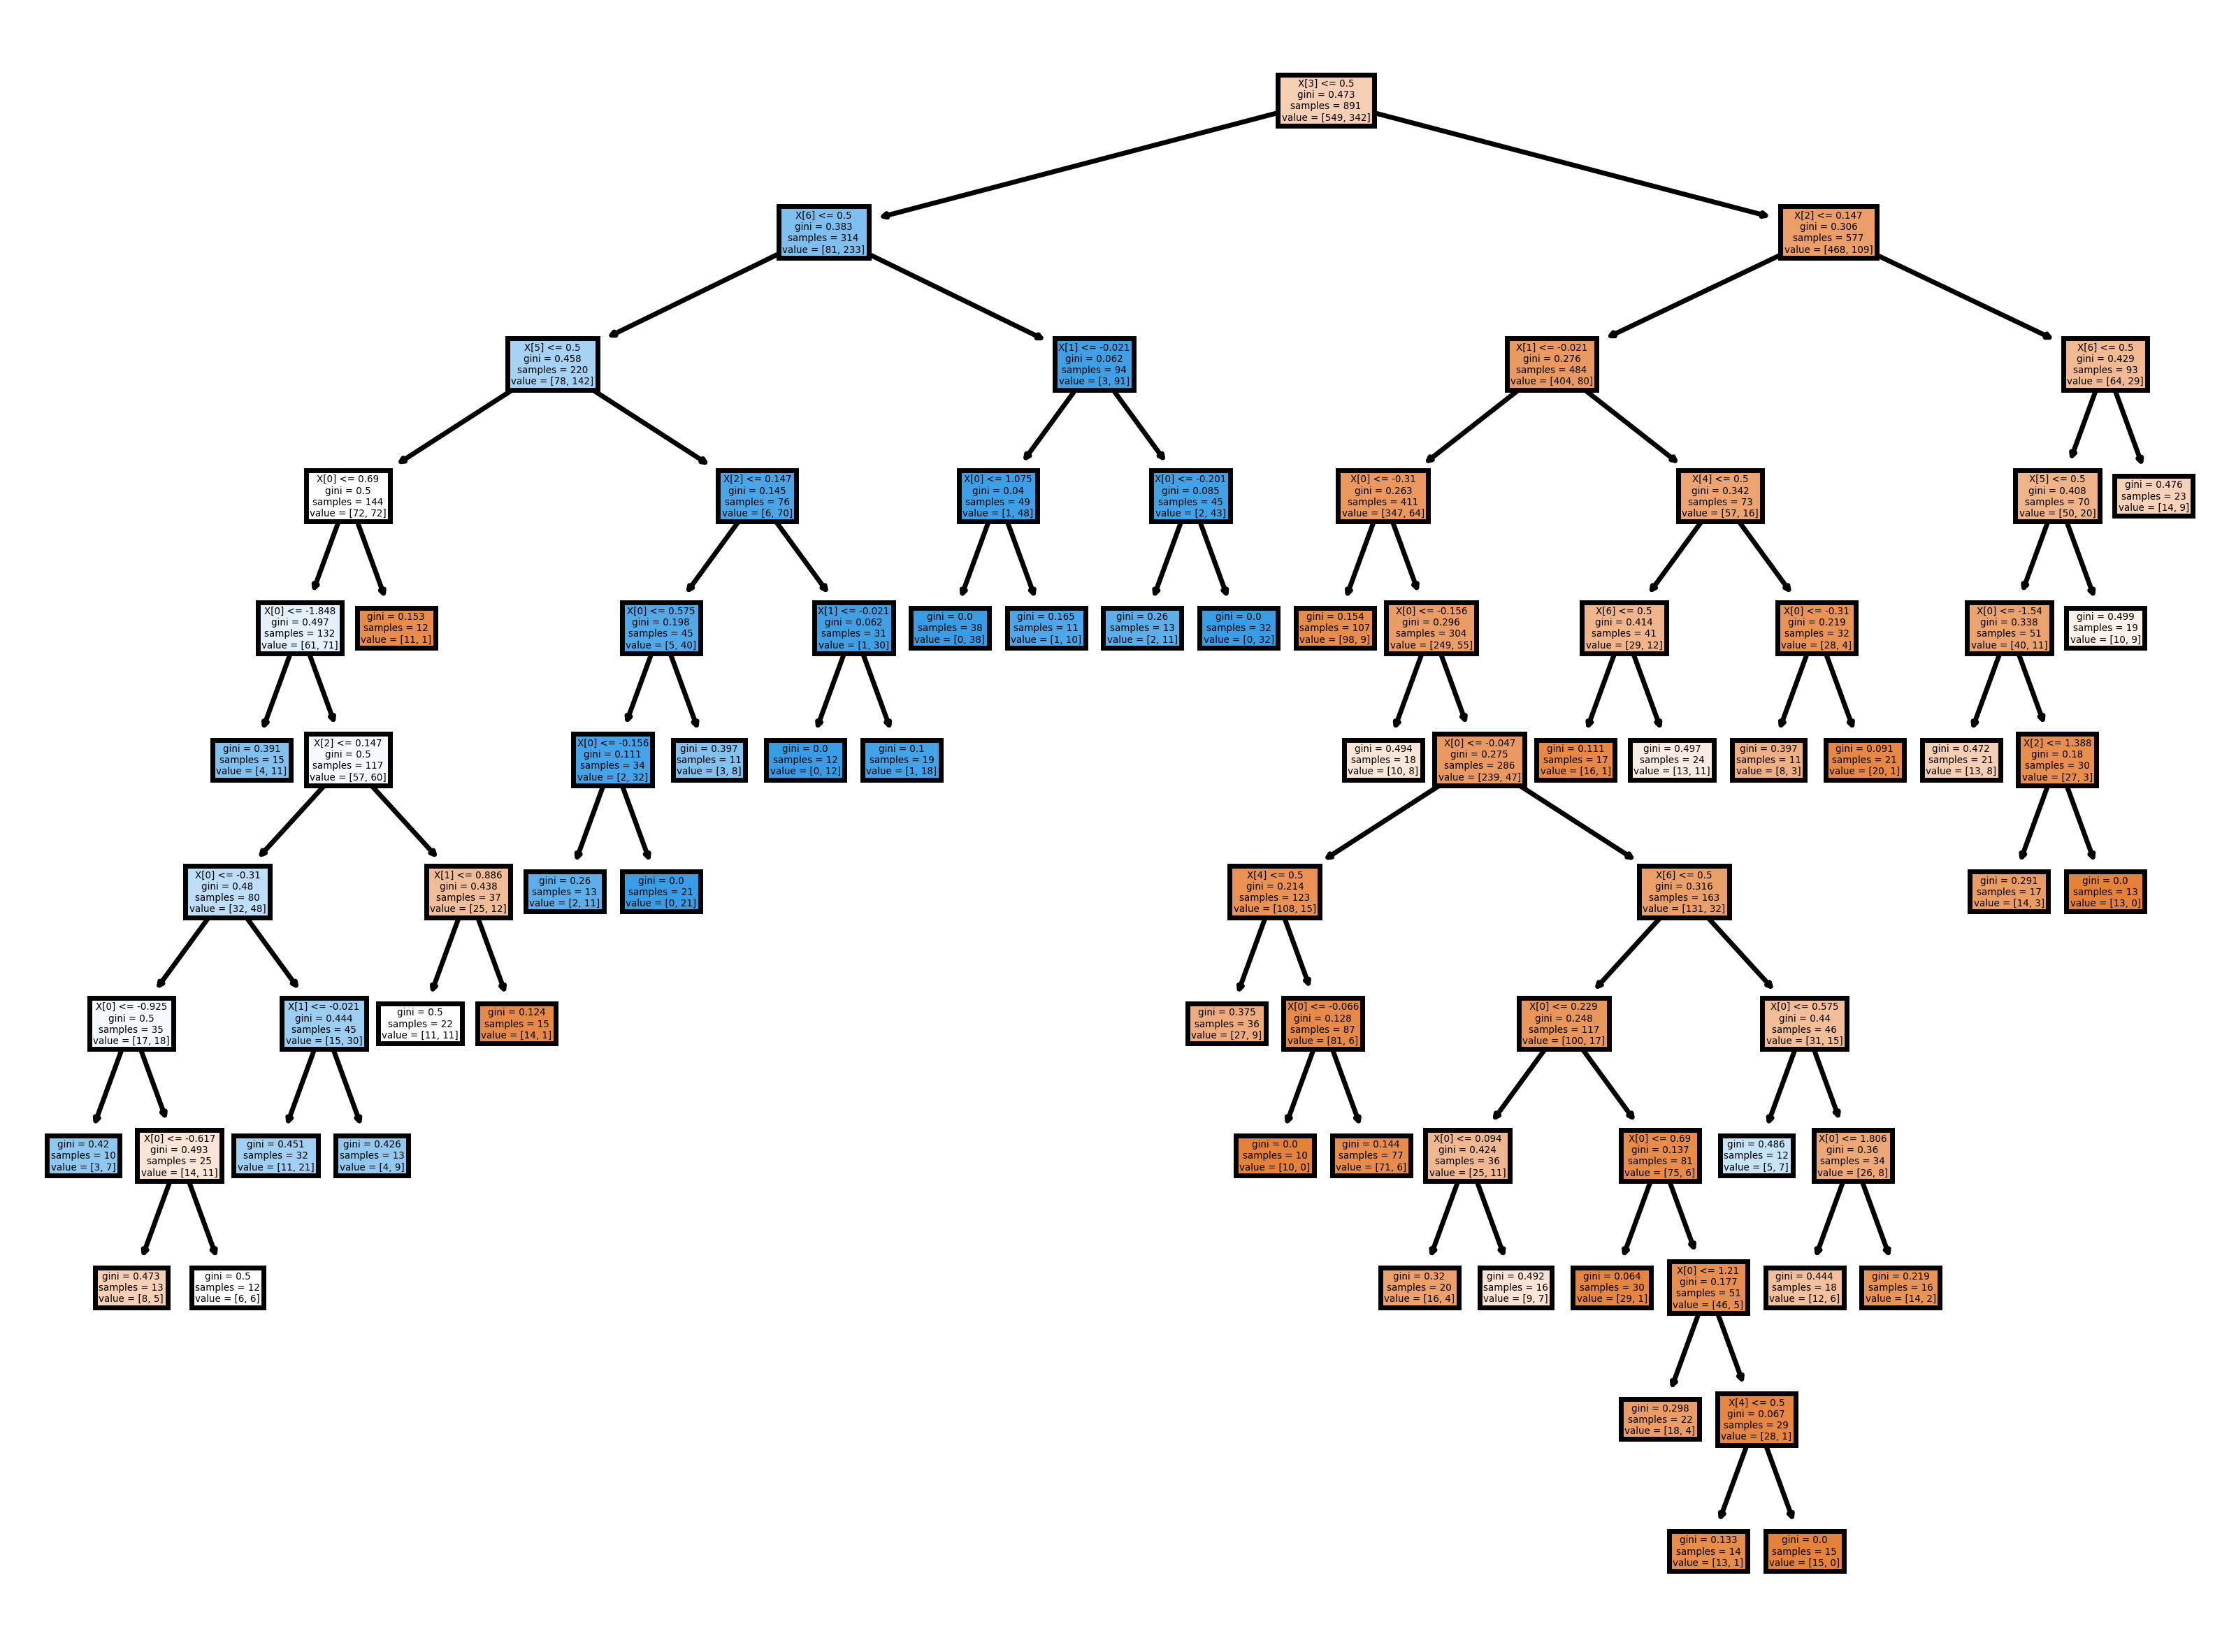

In [6]:
figure(figsize=(8, 6), dpi=500)
mode_predictor(X[1].reshape(1,-1), True), f"real class: {y[1]}"

In [7]:
examples = np.random.randint(0, high=X.shape[0], size=10)
examples

array([872, 525, 272, 715, 165, 166, 221, 609, 673, 301])

In [8]:
mode_predictor(X[examples[0]].reshape(1,-1)), f"real class: {y[examples[0]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.003396943306284626,
  'log_reg_prob': 0.5198671566566602},
 'real class: 0')

In [9]:
mode_predictor(X[examples[1]].reshape(1,-1)), f"real class: {y[examples[1]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.011346383766594786,
  'log_reg_prob': 0.9269406119781333},
 'real class: 0')

In [10]:
mode_predictor(X[examples[2]].reshape(1,-1)), f"real class: {y[examples[2]]}"

({'class': 1.0,
  'naive_bayes_prob': 0.0032791183277008393,
  'log_reg_prob': 0.7572913459399085},
 'real class: 1')

In [11]:
mode_predictor(X[examples[3]].reshape(1,-1)), f"real class: {y[examples[3]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.01320616404502533,
  'log_reg_prob': 0.8485896311324235},
 'real class: 0')

In [12]:
mode_predictor(X[examples[4]].reshape(1,-1)), f"real class: {y[examples[4]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.0009264534104719905,
  'log_reg_prob': 0.8114960712758175},
 'real class: 1')

In [13]:
mode_predictor(X[examples[5]].reshape(1,-1)), f"real class: {y[examples[5]]}"

({'class': 1.0,
  'naive_bayes_prob': 0.007791096987827119,
  'log_reg_prob': 0.9323582341432343},
 'real class: 1')

In [14]:
mode_predictor(X[examples[6]].reshape(1,-1)), f"real class: {y[examples[6]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.00433126100990402,
  'log_reg_prob': 0.705636972199758},
 'real class: 0')

In [15]:
mode_predictor(X[examples[7]].reshape(1,-1)), f"real class: {y[examples[7]]}"

({'class': 1.0,
  'naive_bayes_prob': 0.007072052336989984,
  'log_reg_prob': 0.9052330597023759},
 'real class: 1')

In [16]:
mode_predictor(X[examples[8]].reshape(1,-1)), f"real class: {y[examples[8]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.004278059422579384,
  'log_reg_prob': 0.7361967046375856},
 'real class: 1')

In [17]:
mode_predictor(X[examples[9]].reshape(1,-1)), f"real class: {y[examples[9]]}"

({'class': 0.0,
  'naive_bayes_prob': 0.007199435965069132,
  'log_reg_prob': 0.9381775270423696},
 'real class: 1')